In [1]:
import pymysql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp
import scipy.stats as stats
import csv
import os

from statsmodels.stats.multicomp import MultiComparison
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVR


In [2]:
#carregando dados
data = pd.read_csv('CIIS2020/data/Banco35exames.csv')

In [3]:
#arrumando e retirando colunas 
data['Raça']=data['Raça'].replace(['Branca','Parda','Preta','Indigena','Amarela'],[1,2,3,4,5])
data['Codsexo'] = data['Codsexo'].replace(['Feminino','Masculino'],[1,2])
data.drop(columns = ['RendaSM','RendaFamiliarSM','Id','DN'],inplace=True,errors='ignore')
data.drop(columns = ['TamFamilia','DN','instruc',
                    'CodCid',
                    'CodUBS'
                    'sedentario',
                    'tabagismo',
                    'retorno',
                    'datainicial',
                    'datafinal',
                    'classe_imc',
                    'dataPressaoI',
                    'dataPressaoF',
                    'dataTSHI',
                    'dataHemoglobinaI',
                    'dataHemoglobinaF',
                    'dataAcidoUricoI',
                    'dataCalcioTotalI',
                    'dataColesterolHDLI',
                    'dataColesterolHDLF',
                    'dataColesterolLDLI',
                    'dataColesterolTotalI',
                    'dataColesterolTotalF',
                    'dataHemoglobinaGlicadaI',
                    'dataHemoglobinaGlicadaF',
                    'dataTGPI',
                    'dataTGPF',
                    'dataTrigliceridesI',
                    'dataTrigliceridesF',
                    'dataPotassioI',
                    'dataPotassioF',
                    'dataGlicemiadeJejumI',
                    'dataGlicemiadeJejumF',
                    'dataVITAMINADI',
                    'dataProteinuria24hsI',
                    'dataSodioSericoI',
                    'dataCKI',
                    'dataUreiaI',
                    'dataUreiaF',
                    'desfecho',
                    'ESTÁGIO BANCO',
                    'ESTÁGIO EQ',
                    'ESTÁGIO BANCO.1',
                    'ESTÁGIO EQ.1',
                    'ESTÁGIO BANCO.3',
                    'ESTÁGIO EQ.3',
                    'ESTÁGIO BANCO.4',
                    'ESTÁGIO EQ.4',
                    'ESTÁGIO BANCO.5',
                    'ESTÁGIO EQ.5',
                    'ESTÁGIO BANCO.6',
                    'ESTÁGIO EQ.6',
                    'ESTAGIOI',
                    'ESTAGIOF',
                    'ESTAGIOI - EQ',
                    'ESTAGIOF - EQ',
                    'TFG_1_2011',
                    'TFG_2_2011',
                    'TFG_1_2012',
                    'ESTÁGIO BANCO.2',
                    'ESTÁGIO EQ.2',
                    'TFG_2_2012',
                    'TFG_1_2013',
                    'TFG_2_2013',
                    'TFG_1_2014',
                    'TFG_2_2014',
                    'ESTÁGIO BANCO.7',
                    'ESTÁGIO EQ.7',
                    'CodUBS',
                    'sedentario',
                    'etilismo',
                    'desfecho_txt'],inplace=True,errors='ignore')



### Data preparation

In [9]:
#DATA PREPARATION
#x1 são todas as variáveis sem o meu objetivo que é o EQ, tirei todos os exames que não foram relizados 1_2011
X1 = data.drop(columns=['EQ','EQ.1', 'EQ.2', 'EQ.3', 'EQ.4', 'EQ.5',
               'EQ.6', 'EQ.7','DRC_2_2011', 'DRC_1_2012', 'DRC_2_2012', 'DRC_1_2013',
               'DRC_2_2013', 'DRC_1_2014', 'DRC_2_2014','HAS_2_2011',
               'HAS_1_2012', 'HAS_2_2012', 'HAS_1_2013', 'HAS_2_2013', 'HAS_1_2014',
               'HAS_2_2014', 'DM_2_2011', 'DM_1_2012', 'DM_2_2012',
               'DM_1_2013', 'DM_2_2013', 'DM_1_2014', 'DM_2_2014','Creatinina_2_2011', 'Creatinina_1_2012', 'Creatinina_2_2012',
               'Creatinina_1_2013', 'Creatinina_2_2013', 'Creatinina_1_2014',
               'Creatinina_2_2014']) 
X1 = X1.replace(np.nan,0)
y1 = data['EQ'].replace(np.nan,0)
#colocando na mesma escala
sc_X = StandardScaler()
sc_y = StandardScaler()
X1 = sc_X.fit_transform(X1)
y1 = np.array(y1).reshape(-1,1)
y1 = sc_y.fit_transform(y1)

xtrain, xtest, ytrain, ytest = train_test_split(X1, y1, test_size=0.70,random_state= 20200301)

In [5]:
#avaliando o balanceamento
for exames in X1.keys():
    print('xtrain')
    valor1=xtrain[exames].replace(0.0,np.nan).describe()['count']
    print(exames+':'+str(xtrain[exames].replace(0.0,np.nan).describe()['count']))
    print('xtest')
    valor2=xtest[exames].replace(0.0,np.nan).describe()['count']
    print(exames+':'+str(xtest[exames].replace(0.0,np.nan).describe()['count']))
    print('balanceamento:'+str(valor1/valor2))
    print('\n')
    
print('ytrain')
eq_1=ytrain.replace(0.0,np.nan).describe()['count']
print('EQ:'+str(ytrain.replace(0.0,np.nan).describe()['count']))
print('ytest')
eq_2=ytest.replace(0.0,np.nan).describe()['count']
print('EQ:'+str(ytest.replace(0.0,np.nan).describe()['count']))
print('balanceamento:'+str(eq_1/eq_2))
print('\n')  
    

xtrain
Idade:123.0
xtest
Idade:290.0
balanceamento:0.4241379310344828


xtrain
Codsexo:123.0
xtest
Codsexo:290.0
balanceamento:0.4241379310344828


xtrain
Raça:123.0
xtest
Raça:290.0
balanceamento:0.4241379310344828


xtrain
pesoi:123.0
xtest
pesoi:290.0
balanceamento:0.4241379310344828


xtrain
pesof:123.0
xtest
pesof:290.0
balanceamento:0.4241379310344828


xtrain
Alt:123.0
xtest
Alt:288.0
balanceamento:0.4270833333333333


xtrain
consultasDM:89.0
xtest
consultasDM:203.0
balanceamento:0.43842364532019706


xtrain
consultasDRC:94.0
xtest
consultasDRC:213.0
balanceamento:0.4413145539906103


xtrain
consultasHAS:69.0
xtest
consultasHAS:174.0
balanceamento:0.39655172413793105


xtrain
imc:123.0
xtest
imc:288.0
balanceamento:0.4270833333333333


xtrain
tempoAcompanha:123.0
xtest
tempoAcompanha:289.0
balanceamento:0.42560553633217996


xtrain
PAS_inicial:123.0
xtest
PAS_inicial:290.0
balanceamento:0.4241379310344828


xtrain
PAD_inicial:123.0
xtest
PAD_inicial:290.0
balanceamento:0.4241379

### Models

In [10]:
#Regression Model
regression=LinearRegression(normalize=[True,False]).fit(xtrain,ytrain)
#Elastic Net
elastic=ElasticNet(normalize=[True,False],alpha=0.01).fit(xtrain, ytrain)
#SVR model
regressor = SVR(kernel='rbf').fit(xtrain,ytrain)

/home/gabic9814/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gabic9814/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Estrutura para aplicar modelos

In [11]:
#lista com os modelos
lista_parametros = [regression, elastic, regressor]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                 normalize=[True, False])
R2:-2.655, MSE:0.93, RMSE:0.96


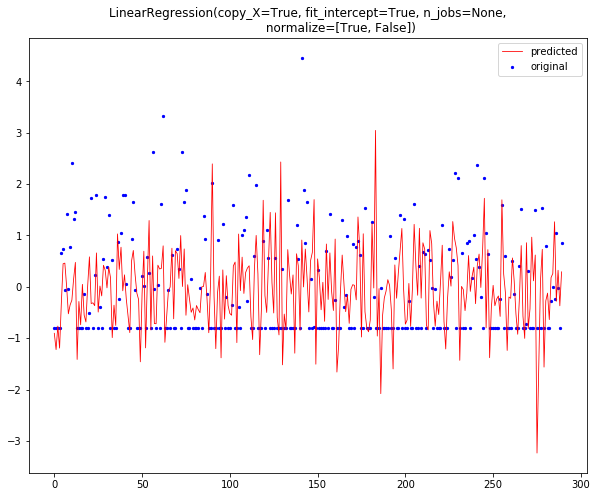

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=[True, False], positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)
R2:-0.001, MSE:0.80, RMSE:0.89


/home/gabic9814/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1784807806739508, tolerance: 0.01031097080112089
  positive)
/home/gabic9814/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13399239455225143, tolerance: 0.010305648425061003
  positive)
/home/gabic9814/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08623604233561366, tolerance: 0.009254467498241168
  positive)
/home/gabic9814/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will chang

{'alpha': 0.008858667904100823}
best:0.6952687561137867


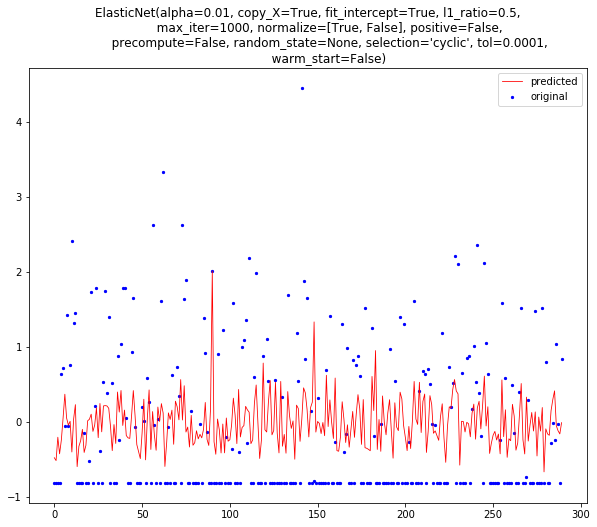

/home/gabic9814/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gabic9814/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/gabic9814/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gabic9814/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will chan

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
R2:0.286, MSE:0.70, RMSE:0.84


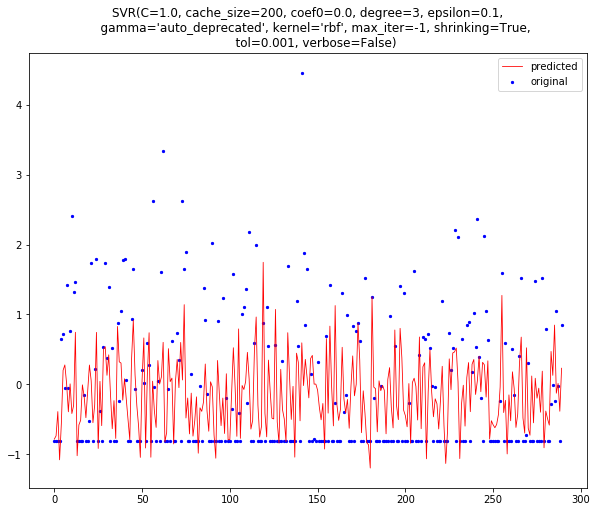

In [12]:
for modelo in lista_parametros:
    ypred = cross_val_predict(modelo,xtest,ytest,cv=5)
    score = modelo.score(xtest, ytest)
    mse = mean_squared_error(ytest, ypred)
    print(str(modelo))
    print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score, mse, np.sqrt(mse)))
    if modelo != regression and modelo != regressor:
        #Achando melhores parâmetros
        search=GridSearchCV(estimator=modelo,param_grid={'alpha':np.logspace(-5,2,20)},
                                                          scoring='neg_mean_squared_error',
                                                          n_jobs=1,refit=True,cv=5)
        search.fit(xtrain,ytrain)
        print(search.best_params_)

        print('best:'+str(abs(search.best_score_)))
    
    plt.figure(figsize=(10,8))
    x_ax = range(len(xtest))
    plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
    plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
    plt.title(str(modelo))
    plt.legend()
#     plt.savefig('resultado_elastic_net_alpha0_01')
    plt.show()
    